https://www.kaggle.com/ash316/eda-to-prediction-dietanic    
DieTanic을 보고 필사한 노트북입니다.

##### 노트북 목차
**Part1: Exploratory Data Analysis(EDA)**
1) Analysis of the features(특징 분석)    
2) Finding any relations or trends considering multiple features. (여러 특징의 관계 또는 추이 발견)
     
**Part2: Feature Engineering and Data Cleaning**
1) Adding any few features.(새로운 특징 추가)    
2) Removing redundant features.(불필요한 특징 제거)     
3) Converting features into suitable form for modeling.(모델링에 맞는 특징으로 변환)  
    
**Part3: Predictive Modeling**    
1) Running Basic Algorithms    
2) Cross Validation     
3) Ensembling     
4) Important Features Extraction(중요 특징 추출)     

# Part1: Exploratory Data Analysis(EDA)

In [2]:
# module load
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('../input/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 null값이 존재한다.

### How many Survived?

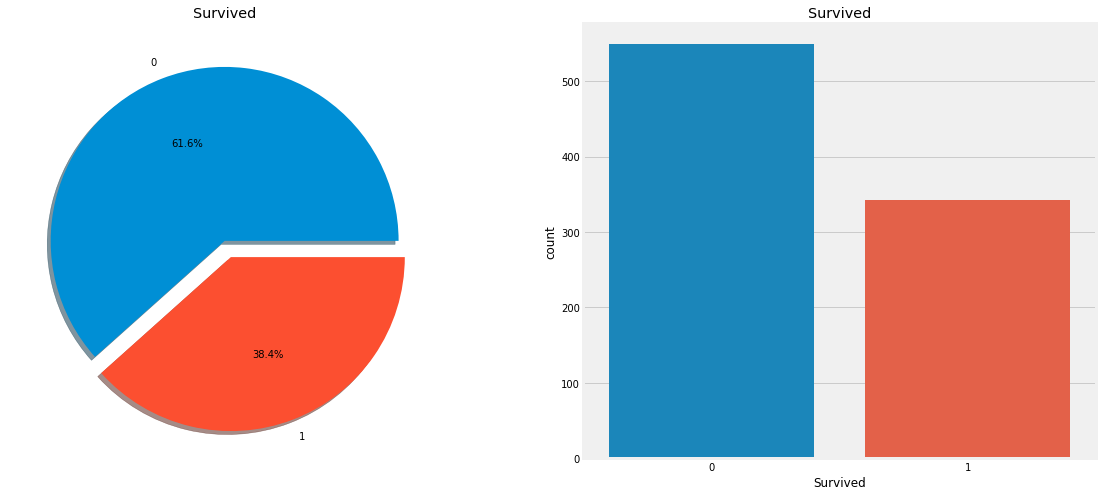

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

training set에 891명의 승객이 있었는데 약 350명(**38.4%**)만 살아남았다.    
우리는 데이터로부터 더 나은 인사이트를 얻고, 생존자와 사망자 카테고리를 더 자세히 보자.    

우리는 데이터셋의 다른 특징을 사용해 생존자 비율을 체크하려고 한다. (특징 : Sex, Port Of Embarcation, Age, etc)

먼저 특징의 다른 타입에 대해서 이해하고 넘어가자.

### Types of Features
* Categorical Features:    
    두개 이상의 범주가 있는 변수. 예를 들어, 성별의 경우 두개의 범주를 갖는 범주형 변수이다.(남,여)    
    범주형 변수는 정력할 수 없기 때문에 **명목변수**라고도 한다.    
    **이 데이터셋에 있는 Categorical Features: Sex, Embarked**
* Ordinal Features: (순서형 변수)
    범주형 변수와 유사하지만 차이점은 값 사이에 상대적인 순서를 지정하거나 정렬할 수 있다는 것이다.     
    예를 들어, tall, medium, short라는 값을 가진 높이라면 높이는 ordinal variable이다.    
    우리는 값을 상대적으로 정렬시킬수 있다.    
    **이 데이터셋에서는 PClass**
* Continous Features: (연속형 변수)    
    두 점 또는 최소값과 최대값 사이에 값을 가지고 올 수 있는 값.    
    **이 데이터셋에서는 Age**

### Analysing The Features

#### Sex(Categorical Feature)

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

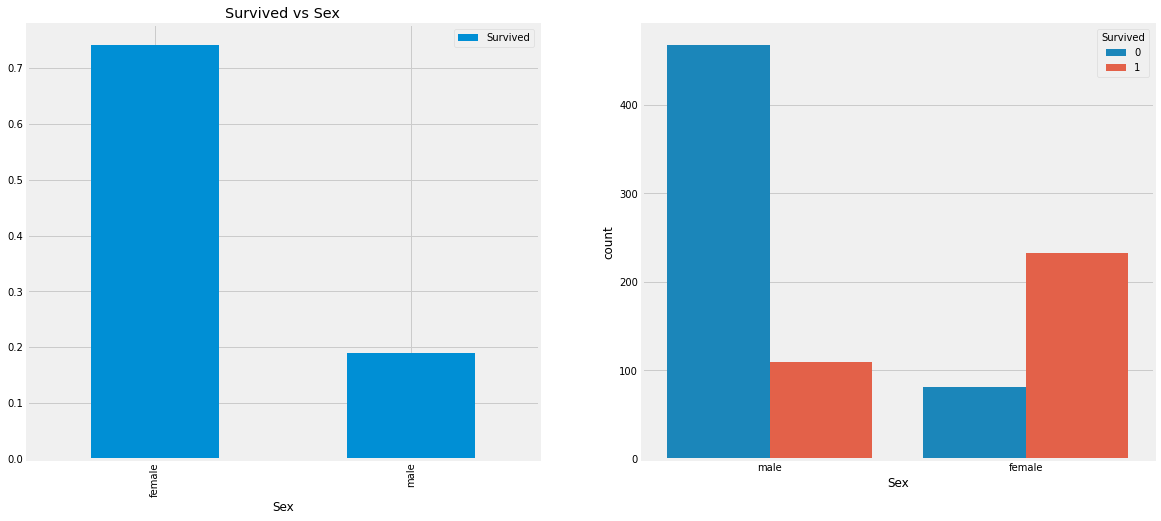

In [8]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data=data, ax=ax[1])
plt.show()

###### 알 수 있는 것
* 배에 타고 있는 남자들의 수가 여자들의 수보다 훨씬 많다.
* 하지만 생존률은 여성이 훨씬 높다.(여성: 75%, 남성:18%~19%)

#### PClass(Ordinal Feature)

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


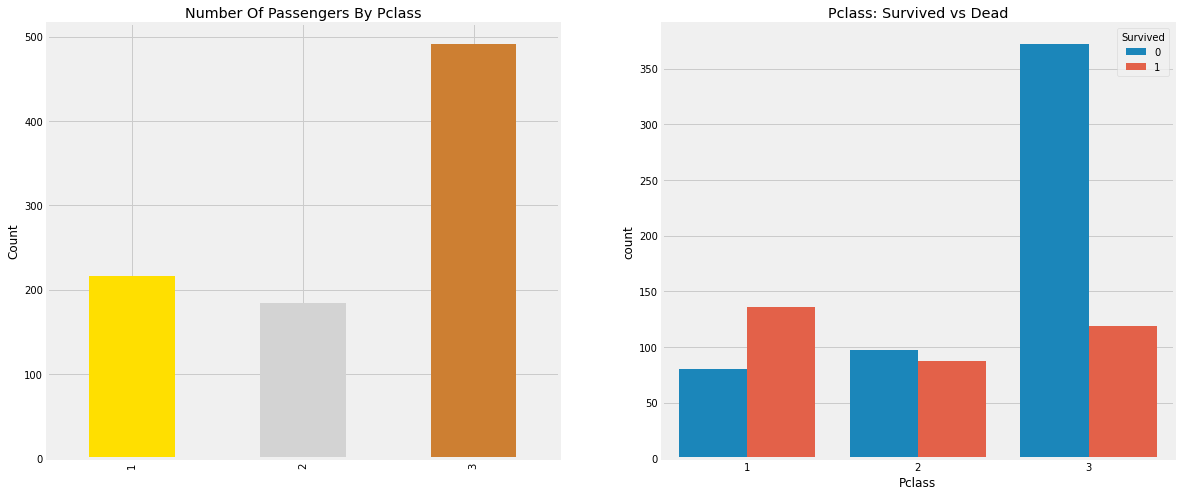

In [10]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

###### 알 수 있는 것
* 3 class 승객이 제일 많다.
* 사망률도 3 class가 제일 높다.
* Pclass 1: 63%, Pclass 2: 48%, Pclass 3: 25% 의 생존율을 보이고 있다.

Sex와 P class를 함께 사용해 생존율을 확인해보자.

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

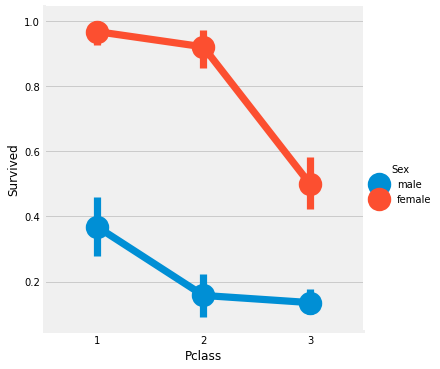

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

factorplot을 이용하면 범주형 값의 분리가 쉽기 때문에 사용했다.

###### 알 수 있는 것
* Pclass에 상관없이 여성이 우선적으로 구조되었다.
* Pclass 1의 남성도 생존율이 낮다.

#### Age(Continous Feature)

In [13]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


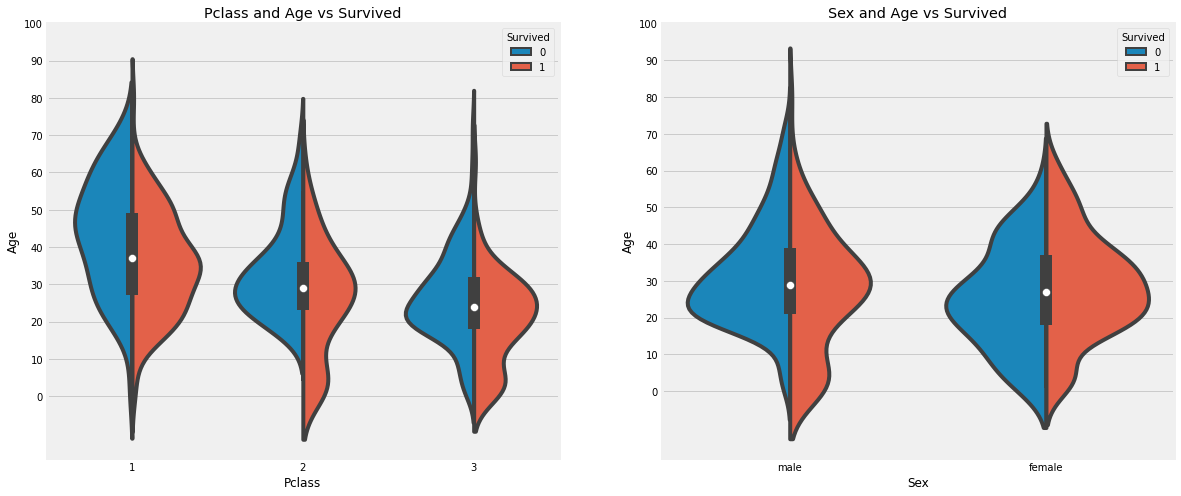

In [14]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age',hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age',hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

###### 알 수 있는 것
* 어린이의 수는 P class 따라 증가하고, 10세 미만 승객의 생존율은 Pclass와 상관없이 양호하다.
* Pclass 1의 경우 20~50세 사이 생존율이 높고, 여성의 경우도 높다.
* 남성의 경우 나이가 증가하면 생존율이 떨어진다.

앞에서 null check를 했을 때 age에 177개의 null값이 있었다.    
null 값을 대체하기 위해 데이터 셋의 평균 나이를 사용할 수 있다.    
하지만 나이의 범위가 너무 넓은 것이 문제이다. 승객이 어느 나이대에 거짓말을 하는지 알 수 있을까??    
    
이름을 사용할 수 있다. 이름 데이터를 살펴보면 Mr/Mrs같은 접두어를 살펴볼 수 있다. 따라서 Mr와 Mrs의 평균 값을 각 그룹에 할당할 수 있다.

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

'문자열.'형태의 문자열을 추출함으로써 Mr., Miss. 등을 추출했다.

In [16]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


오탈자나 다른 값들을 같은 의미를 가진 값으로 대체한다.

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean().to_frame()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


#### Filling NaN Ages

In [19]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [20]:
data.Age.isnull().any() # any() : NaN값이 하나라도 있음 True, 없으면 False를 반환

False

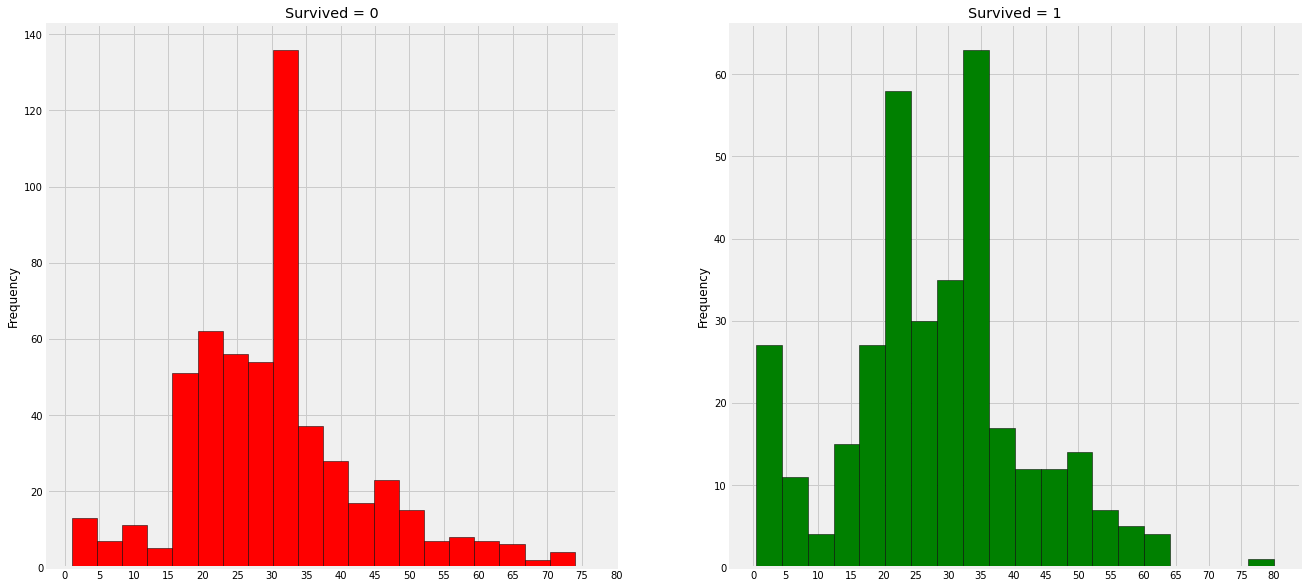

In [21]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(list(range(0,85,5)))
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

###### 알 수 있는 것
* 5살 이하의 생존율이 높다.
* 30~40 사이 사망율이 최대값이다.
* 가장 나이가 많은 생존자는 80대이다.

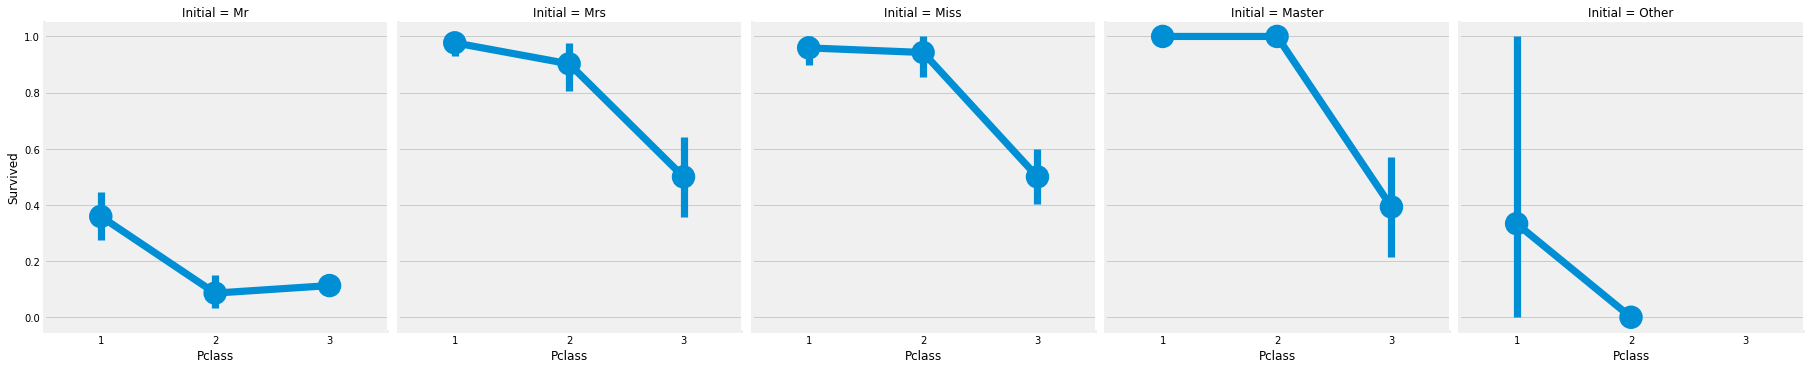

In [22]:
sns.factorplot('Pclass', 'Survived',col='Initial',data=data)
plt.show()

###### 알 수 있는 것
* 여성과 어린이 우선 정책은 계급에 상관이 없다.

#### Embarked(Categorical Value) -> 승선항

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**Embarked**    
* C : Cherbourg
* Q : Queenstown
* S : Southampton

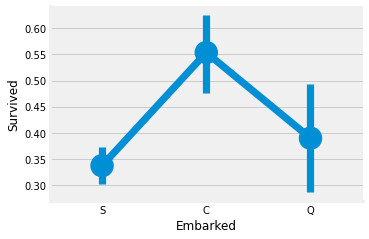

In [24]:
# Embarked에 따른 생존률
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

생존율이 가장 높은 항구는 C (약 0.55)이고, 가장 낮은 항구는 S (약 0.35)이다.

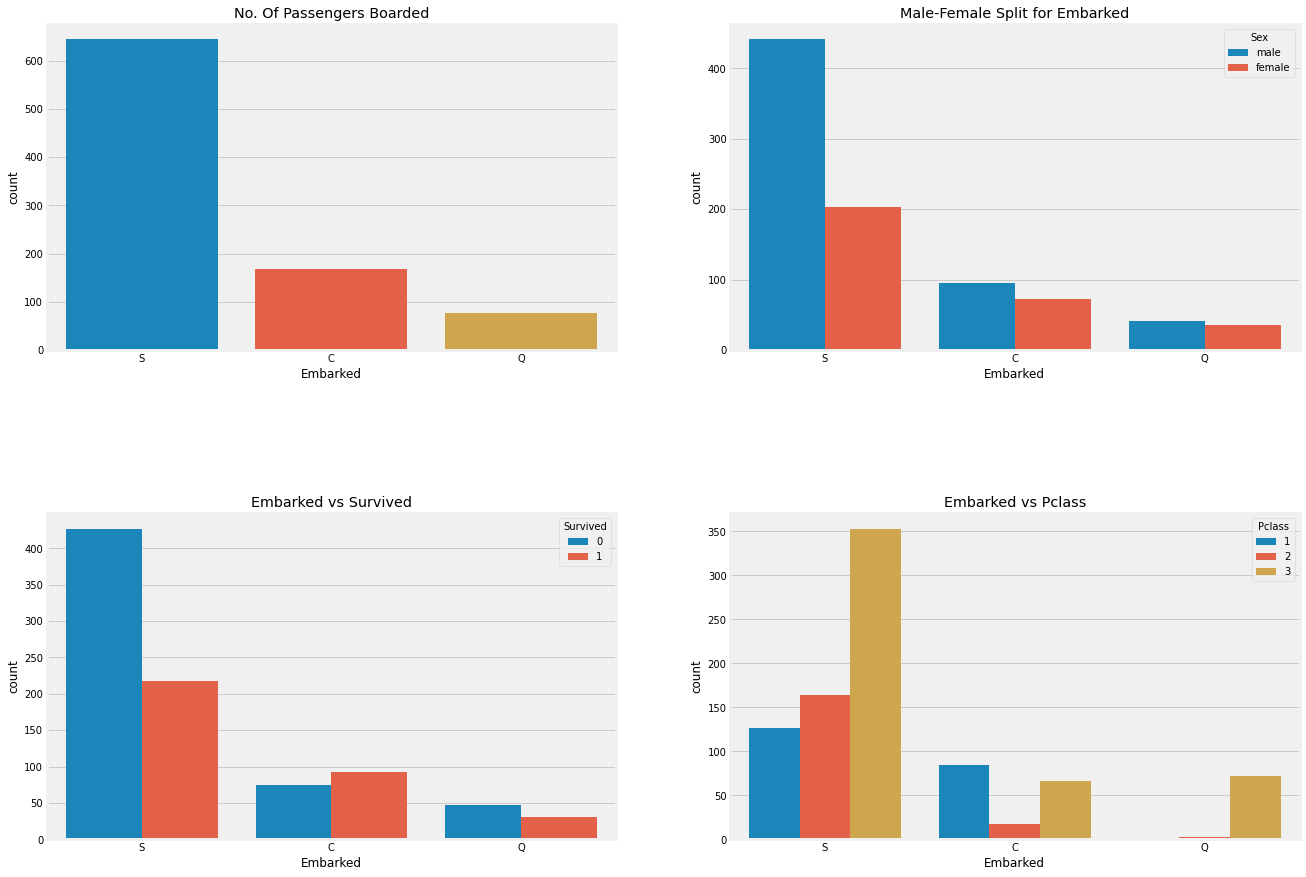

In [25]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

###### 알 수 있는 것
* S 탑승객이 제일 많고, 주요 탑승 Pclass는 3이다.
* C에서 온 승객의 생존율이 사망율보다 높다. 그 이유는 Pclass 1, Pclass2 승객을 모두 구조한것이라 유추할 수 있다.
* S 의 Pclass 1, 2 탑승객이 많은 것을 알 수 있다. Pclass 3의 탑승객도 많고, Pclass 3은 생존율이 낮기 때문에 전체 생존율은 낮다.
* Q 탑승객은 95%가 Pclass 3이다.

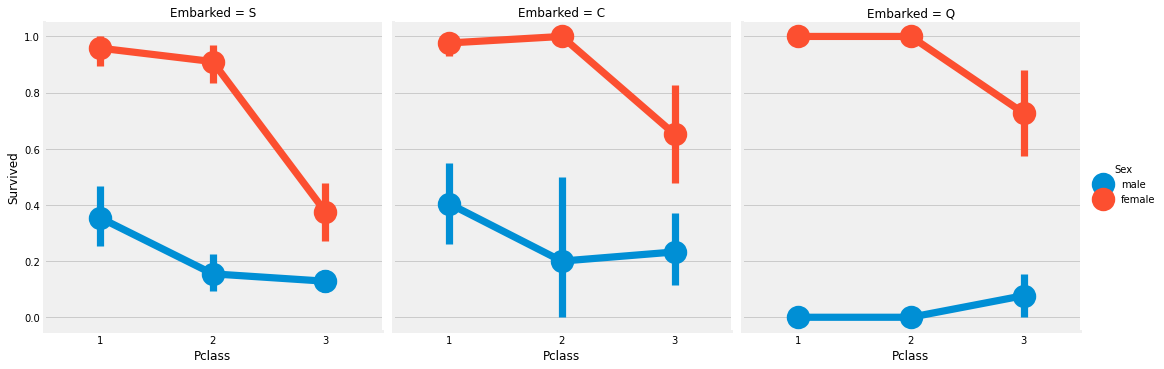

In [26]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

###### 알 수 있는 것
* Pclass 1, 2 여성의 생존율은 거의 1이다.
* S 탑승객의 경우 Pclass 3의 여성과 남성 모두 생존율이 낮다.
* Q 탑승객의 경우 거의 Pclass 3이기에 남성의 생존율이 낮아보인다.

#### Filling Embarked NaN

S항구의 탑승객이 제일 많아보이기에 NaN을 S로 대체한다.

In [27]:
data['Embarked'].fillna('S', inplace=True)

In [28]:
data.Embarked.isnull().any()

False

#### SibSip(Discrete Feature)  -> 가족관계
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

In [29]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


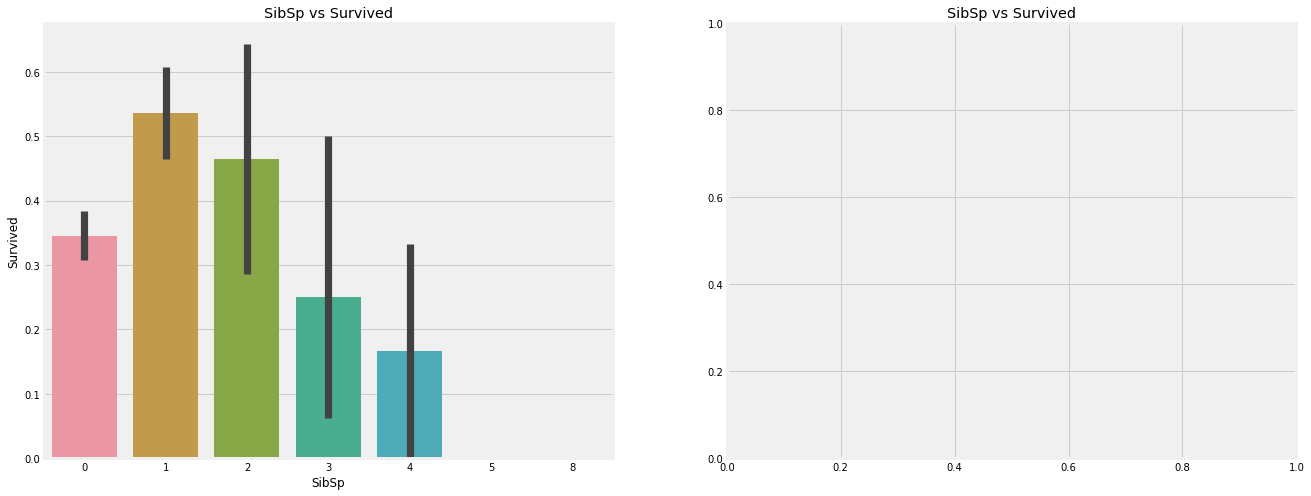

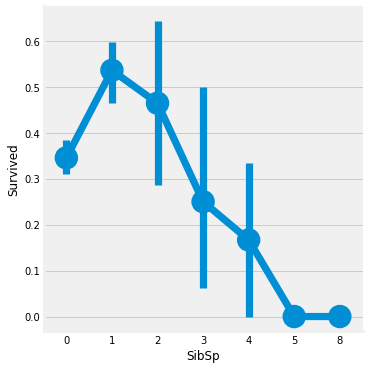

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


###### 알 수 있는 것
* sibling이 없는 경우 34.5%의 생존율을 보인다.
* sibling이 늘어날수록 생존율이 떨어진다.
* sibling이 5~8명인 탑승객의 생존율은 0%이다.
* sibling >3 인 탑승객은 모두 Pclass 3에 있다.

#### parch  -> 가족관계

* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson    
Some children travelled only with a nanny, therefore parch=0 for them.    
(일부 아이들은 유모와 여행을 다녔기 때문에 parch=0이다.)

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


대가족은 Pclass 3에 있다고 다시 한번 보여주고 있다.

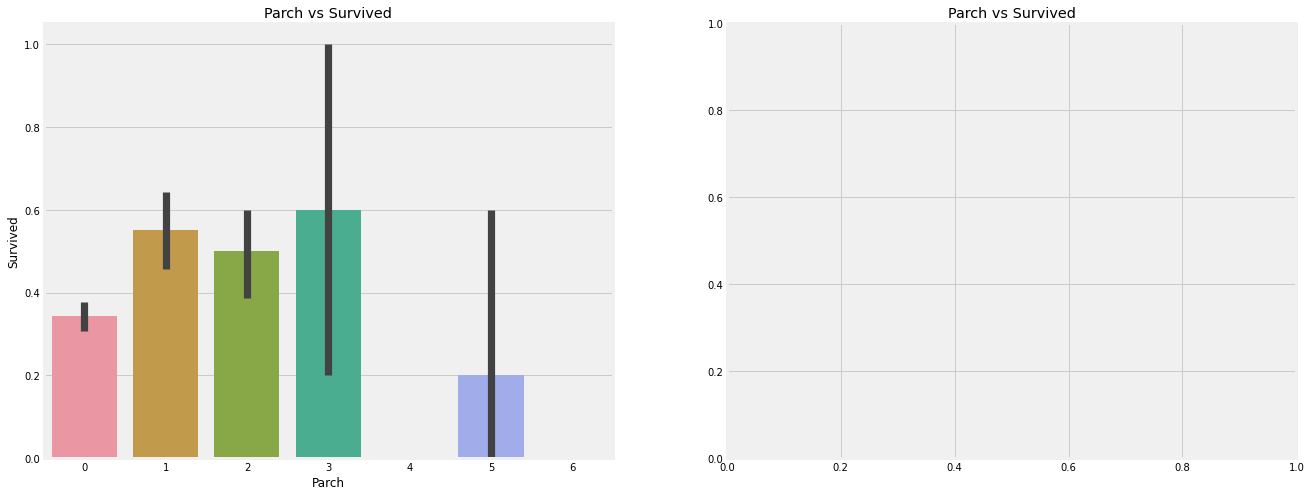

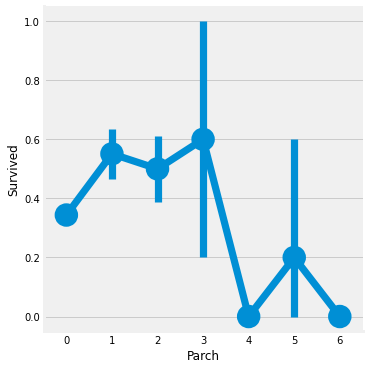

In [33]:
f, ax=plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

###### 알 수 있는 것
* 부모와 함께 탄 승객은 생존율이 높지만, 숫자가 늘어날수록 생존율이 떨어진다.
* 1~3명과 함께 탄 승객들의 생존율이 높다.

#### Fare(Continous Feature)

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


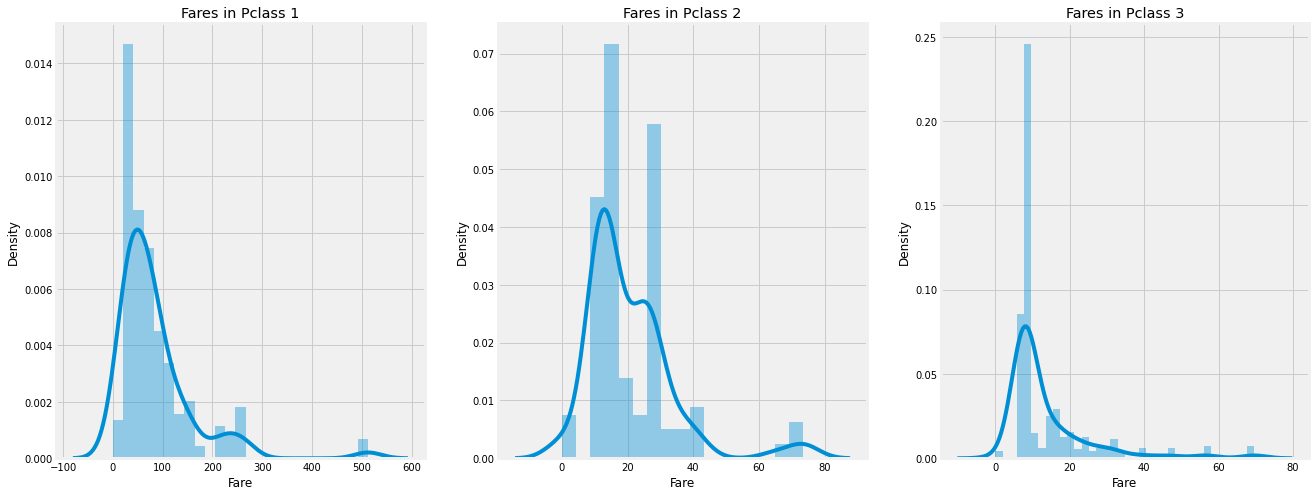

In [35]:
f, ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

fare가 증가하면서 분포가 줄어들고있다.

### Observations in a Nutshell for all features
* Sex: 여성이 남성과 비교해서 생존율이 높다.
* Pclass: 1st Class 탑승객이 생존율이 가장 높고 3rd Class 탑승객의 생존율이 가장 낮다. 여성의 경우 Pclass 1에서 생존 확률은 거의 1이고, Pclass 2에서도 생존 확률이 높다.
* Age: 5\~10세 어린이는 생존율이 높고, 15\~35세 탑승객의 생존율은 낮다.
* Embarked: Pclass 1이 많은 C의 경우 Pclass 3이 대다수인 Q보다 생존율이 높다.
* Parch+SibSp: 형제/자매 1\~2명과 같이 탑승했거나, 1\~3의 부모와 탑승한 사람들의 생존률이 혼자 탑승하거나 대가족으로 탑승한 사람들보다 높다.

### Correlation Between The Features

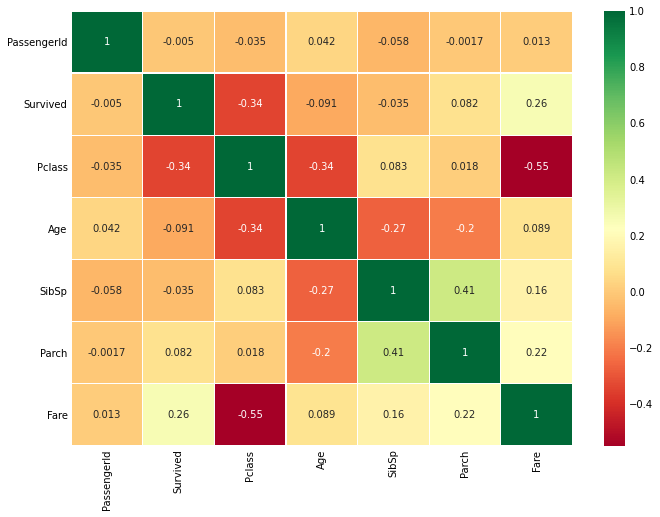

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

###### Heatmap의 해석
* 양성 상관관계 : 특성 A가 증가하면 특성 B가 증가하는 것. 1일때 완벽한 양의 상관 관계를 의미
* 음성 상관관계 : 특성 A가 감소하면 특성 B가 감소하는 것. -1일때 완벽한 음의 상관 관계를 의미


###### 알 수 있는 것
* feature들의 상관관계가 크지 않다.
* 가장 높은 상관관계를 갖는 feature는 Parch와 Sibsp이다.

# Part2: Feature Engineering and Data Cleaning

## Age_band
Age의 경우 continous feature인데 머신러닝 머델에서는 continous variables에 문제가 있다.    
나이별로 묶으려고 할 때 연속형이기에 범주가 없기 때문. 따라서 Binning 또는 Normalization으로 범주형 값으로 변환해야 한다. 여기서는 Binning을 사용한다. 즉, 연령 범위를 단일 bin으로 그룹화하거나 단일 값을 할당한다.

In [37]:
data.Age.describe()

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

최대 연령은 80세이다. 그러면 0~80까지 5개의 범주로 나눈다.

In [38]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


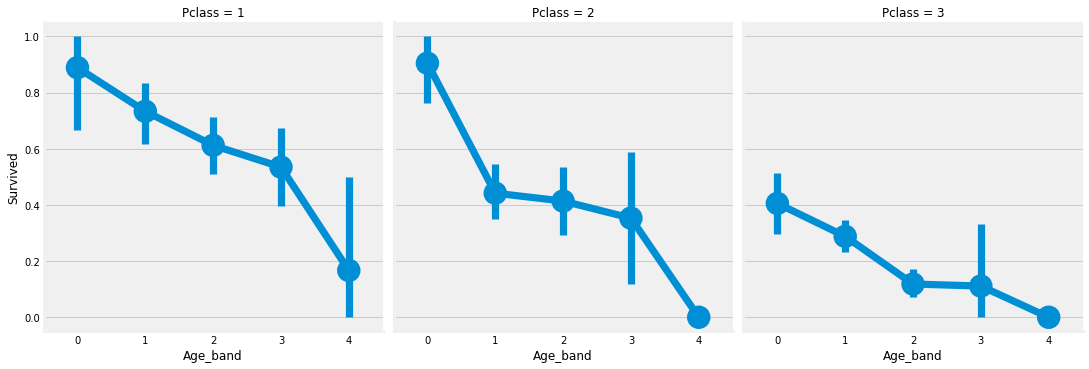

In [41]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

P class 상관없이 나이가 많아지면 생존율이 감소한다.

## Family_Size and Alone
* Family_Size = Parch와 SibSp를 합쳐서 가족의 규모를 가지는 feature
* Alone = 승객이 혼자인지 아닌지를 나타내는 feature

In [42]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0

data.loc[data.Family_Size ==0, 'Alone'] = 1

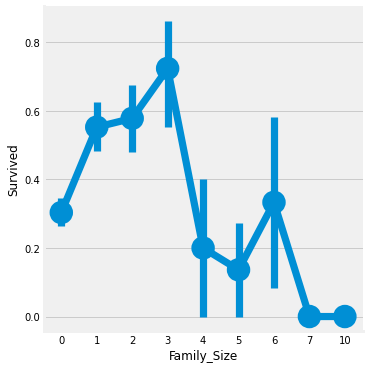

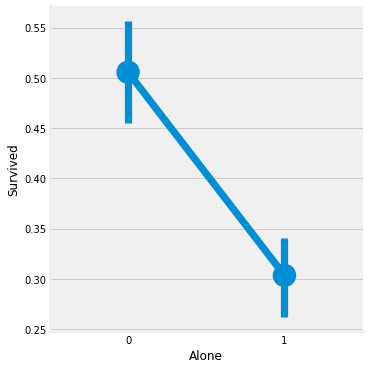

In [47]:
f, ax=plt.subplots(1,2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1)
plt.show()

* family_size=0(alone)일때 생존율이 낮고, 또 family_size >=4 일때 생존율이 감소한다.

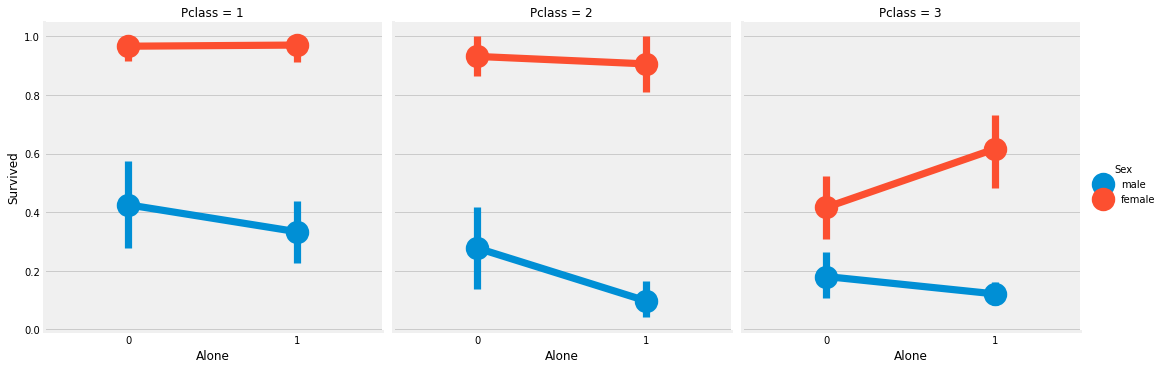

In [48]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

P class 3의 여성을 제외하고 혼자 탑승한 것이 클래스와 성별 구분없이 생존율이 낮다.

## Fare_Range
fare도 continous feature이다. 이것을 ordinal value(순서형 범주)로 바꿔야 한다. 여기서는 `pandas.qcut`을 이용할 것이다.

In [49]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


여기서 fare range가 증가하면 생존율이 높아지는 것을 볼 수 있다.    
Age_Band에서 했던 것처럼 값을 변환해준다.(범주형으로 변환)

In [50]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

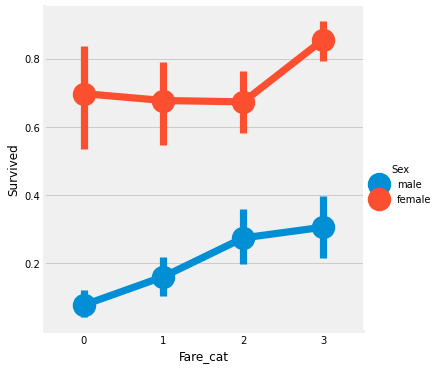

In [51]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

fare_cat이 증가하면 성별 상관없이 생존율이 증가한다.

## Converting String Values into Numeric
문자형 데이터를 머신러닝 모델에 넣지 못하므로 숫자형 데이터로 바꿔준다.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Initial      891 non-null    object  
 13  Age_band     891 non-null    int64   
 14  Family_Size  891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
 17  Fare_cat     891 non-null    int64   
dtypes: category(1), float64(2), in

In [53]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping UnNeeded Features
* Name : 범주형 값으로 변환할 수 없기 때문에 필요없다.
* Age : Age_band가 추가되었기에 필요없다.
* Ticket : 랜덤하게 생성된 문자열이기 때문에 필요없다.
* Fare, Fare_Range : Fare_cat을 추가되었기에 필요없다.
* Cabin : 많은 결측치가 있기 때문에 필요없다.
* PassengerId : 탑승객의 고유한 값이기 때문에 필요가 없다.

In [54]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Fare_Range', 'Cabin', 'PassengerId'], axis=1, inplace=True)

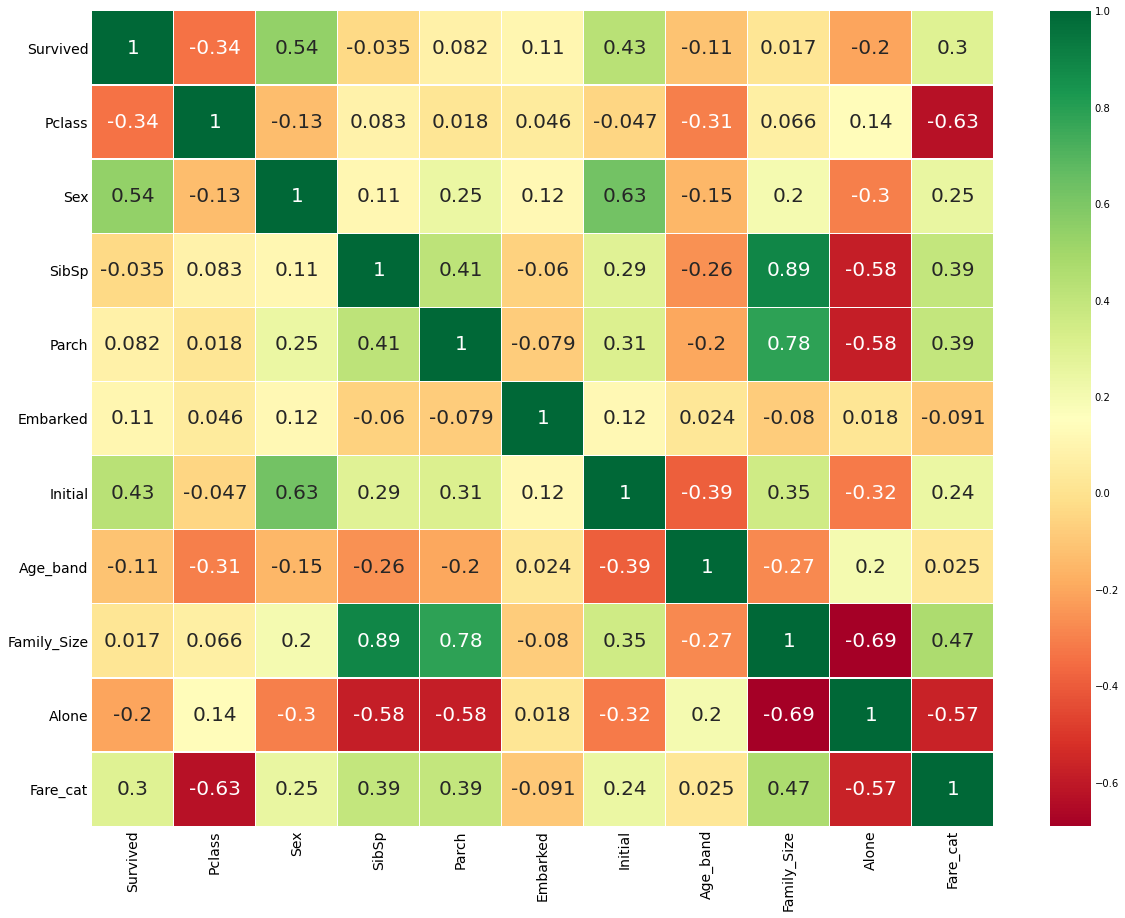

In [55]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Parch와 Family_size, SibSp와 Family_size는 양의 상관관계를 갖고 있다.
* Alone과 Family_size는 음의 상관관계를 갖고 있다.